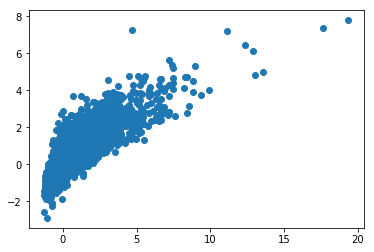

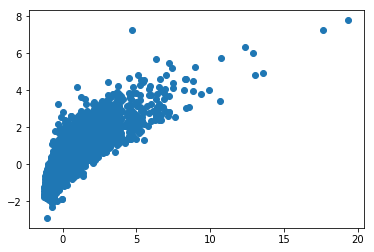

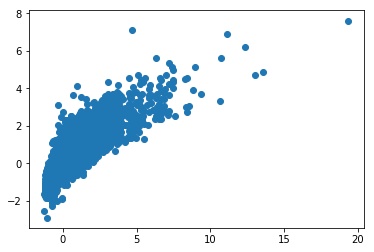

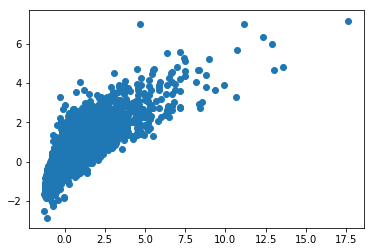

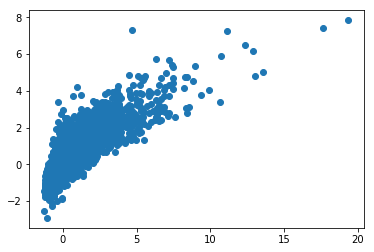

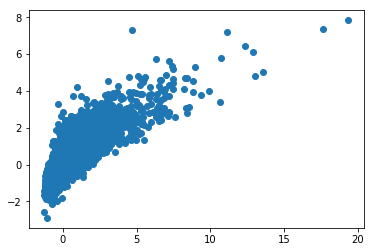

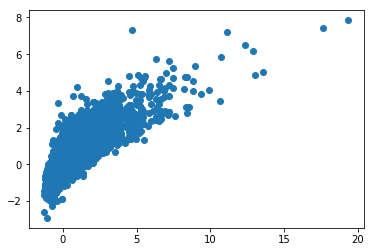

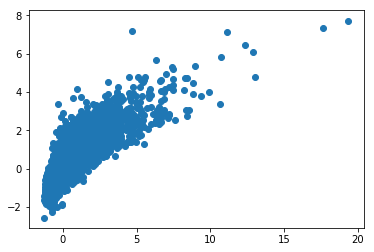

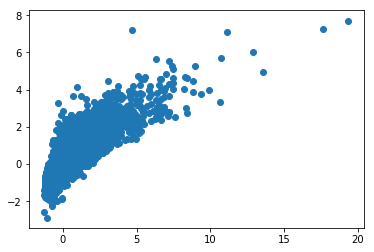

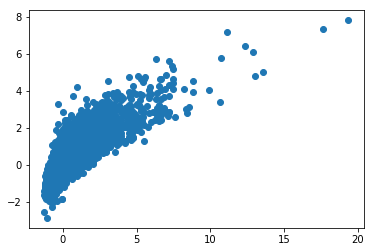

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

lr, alpha, max_epochs = 0.006, 0.8, 5000

def loadData():
    train = pd.read_csv("kc_house_train_data.csv")
    test = pd.read_csv("kc_house_test_data.csv")
    return [train, test]

def normalizeData(data):
    data  = (data - data.mean())/data.std()
    return data

def load_testData():
    [train, test] = loadData()
    test_IDs = test['id']
    test_actual_price = np.array(test['price'])
    test = test.drop(['id', 'price'], axis = 1)
    i = 0
    conv_dates = []
    for value in test['date']:
        year = int(value[:4])
        month = int(value[4:6])
        day = int(value[6:8])
        conv_dates.insert(i, year*365 + month*30 + day) 
        i = i+1
    min_date = min(conv_dates)
    conv_dates = [date-min_date for date in conv_dates]
    test['date'] = conv_dates
    test = normalizeData(test)
    test_actual_price = (test_actual_price-np.mean(test_actual_price))/np.std(test_actual_price)

def load_trainData():
    [train, test] = loadData()
    train_IDs = train['id']
    train_actual_price = np.array(train['price'])    
    train = train.drop(['id', 'price'], axis = 1)    
    i = 0
    conv_dates = []
    for value in train['date']:
        year = int(value[:4])
        month = int(value[4:6])
        day = int(value[6:8])
        conv_dates.insert(i, year*365 + month*30 + day) 
        i = i+1
    min_date = min(conv_dates)
    conv_dates = [date-min_date for date in conv_dates]
    train['date'] = conv_dates
    train = normalizeData(train)    
    train_actual_price = (train_actual_price-np.mean(train_actual_price))/np.std(train_actual_price)    
    return [train, train_actual_price]

def compute_cost(actual_price, predicted_price, coeff):
    sq_loss = (actual_price - predicted_price)**2
    regularizer = coeff**2
    cost = np.sum(sq_loss) + alpha*np.sum(regularizer)
    return cost/(2*actual_price.shape[0])

def compute_accuracy(actual_price, predicted_price):
    count = 0
    accuracy = abs(np.subtract(actual_price, predicted_price))
    for value in accuracy:
        if(value < 0.5):
            count = count + 1
    accuracy = count/actual_price.shape[0]
    return accuracy*100

def initialize_coeff(size):
    np.random.seed(786)
    coeff = np.random.randn(size)
    bias = np.random.randn()
    return [coeff, bias]

def ridgeRegression(X_train, X_valid, Y_valid, Y_train):    
    [coeff, bias] = initialize_coeff(X_train.shape[1])
    all_coeff = []
    for epoch in range(max_epochs):
        Y_hat_train = np.dot(X_train, coeff) + bias
        Y_hat_valid = np.dot(X_valid, coeff) + bias
#         if(epoch%1000 == 0):
#             print("Train Score: %f"%compute_cost(Y_train, Y_hat_train, coeff))
#             print("Valid Score: %f"%compute_cost(Y_valid, Y_hat_valid, coeff))
        # print(compute_accuracy(Y_train, Y_hat_train))
        delta_bias = np.sum(Y_hat_train - Y_train)
        delta_coeff = np.dot((Y_hat_train - Y_train), X_train)
        bias = bias - (lr/X_train.shape[0])*(delta_bias)
        coeff = coeff - (lr/X_train.shape[0])*(delta_coeff + alpha*coeff)
        all_coeff.insert(epoch, coeff) # all_coeff = epoch X 19
    return all_coeff

def ridgeCrossVal():
    [train, train_actual_price] = load_trainData()
    X = np.array(train)
    Y = train_actual_price
    kf = KFold(n_splits=10,shuffle=True, random_state=1234)
    KFold_coeff = []
    for train_index, valid_index in kf.split(X):    
        X_train, X_valid = X[train_index], X[valid_index]
        Y_train, Y_valid = Y[train_index], Y[valid_index]
        #print("---------------------------------Fold-----------------------------------------------------")
        KFold_coeff.append(ridgeRegression(X_train, X_valid, Y_valid, Y_train))
    wts = 0
    for w in KFold_coeff:
        wts = wts + np.array(w)
    wts = wts/10;
    return wts



wts = ridgeCrossVal()
final_coeff = wts[4999] 

In [ ]:
print(wts[4999]-wts[0])

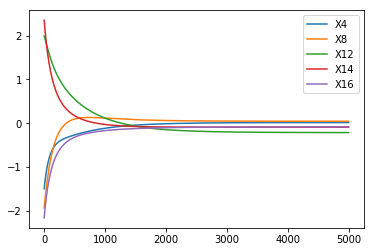

In [46]:
plt.plot([i for i in range(5000)], [wts[i][4] for i in range(5000)], label = "X4")
plt.plot([i for i in range(5000)], [wts[i][8] for i in range(5000)], label = "X8")
plt.plot([i for i in range(5000)], [wts[i][12] for i in range(5000)], label = "X12")
plt.plot([i for i in range(5000)], [wts[i][14] for i in range(5000)], label = "X14")
plt.plot([i for i in range(5000)], [wts[i][16] for i in range(5000)], label = "X16")
plt.legend()
plt.show()
plt.savefig("Ridge Coeff profile.png")

In [ ]:
print(wts[4999])

In [ ]:
train = 0.14
test = 0.15

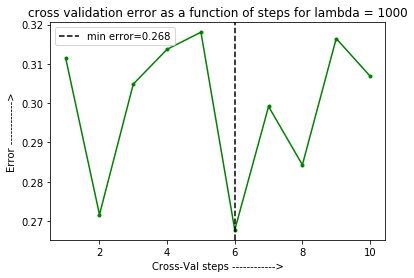

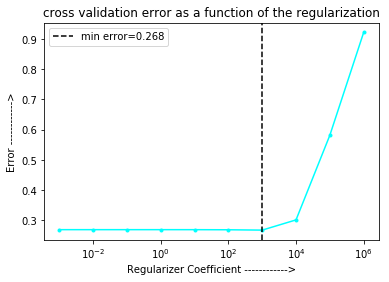

0.691414668376


In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

l2_lambda = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
# l2_lambda = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

def loadData():
    train = pd.read_csv("kc_house_train_data.csv")
    test = pd.read_csv("kc_house_test_data.csv")
    return [train, test]

def normalizeData(data):
    data  = (data - data.mean())/data.std()
    return data

def load_testData():
    [train, test] = loadData()
    test_IDs = test['id']
    test_actual_price = np.array(test['price'])
    test = test.drop(['id', 'price'], axis = 1)
    i = 0
    conv_dates = []
    for value in test['date']:
        year = int(value[:4])
        month = int(value[4:6])
        day = int(value[6:8])
        conv_dates.insert(i, year*365 + month*30 + day) 
        i = i+1
    min_date = min(conv_dates)
    conv_dates = [date-min_date for date in conv_dates]
    test['date'] = conv_dates
    test = normalizeData(test)
    test_actual_price = (test_actual_price-np.mean(test_actual_price))/np.std(test_actual_price)
    return [test, test_actual_price]

def load_trainData():
    [train, test] = loadData()
    train_IDs = train['id']
    train_actual_price = np.array(train['price'])    
    train = train.drop(['id', 'price'], axis = 1)    
    i = 0
    conv_dates = []
    for value in train['date']:
        year = int(value[:4])
        month = int(value[4:6])
        day = int(value[6:8])
        conv_dates.insert(i, year*365 + month*30 + day) 
        i = i+1
    min_date = min(conv_dates)
    conv_dates = [date-min_date for date in conv_dates]
    train['date'] = conv_dates
    train = normalizeData(train)    
    train_actual_price = (train_actual_price-np.mean(train_actual_price))/np.std(train_actual_price)    
    return [train, train_actual_price]

def compute_cost(actual_price, predicted_price):
    sq_loss = (actual_price - predicted_price)**2
    cost = np.sum(sq_loss) 
    return cost/(actual_price.shape[0])

def initialize_coeff(size):
    np.random.seed(786)
    coeff = np.random.randn(size)
    bias = np.random.randn()
    return [coeff, bias]

def ridgeCrossVal():
    [train, Y] = load_trainData()
    [test, Y_test] = load_testData()
    X_test = np.array(test)
    X = np.array(train)
    kf = KFold(n_splits=10,shuffle=True, random_state=1234)
    KFold_coeff = []
    KFold_valError = []
    Y_pred_test = []
    test_score, disp = 0, 1
    for i in range(10): 
        mini = 9999
        coef = []
        for train_index, valid_index in kf.split(X):    
            X_train, X_valid = X[train_index], X[valid_index]
            Y_train, Y_valid = Y[train_index], Y[valid_index]
            clf = Ridge(alpha=l2_lambda[i])
            clf.fit(X_train,Y_train)
            if(mini > (1-clf.score(X_valid, Y_valid))):
                mini = 1-clf.score(X_valid, Y_valid)
                coef = clf.coef_
                if(i == 6 and disp == 1):
                    tempScore = []
                    step = 1
                    for j, k in kf.split(X):    
                        X_j, X_k = X[j], X[k]
                        Y_j, Y_k = Y[j], Y[k]
                        clf = Ridge(alpha=l2_lambda[i])
                        clf.fit(X_j,Y_j)
                        tempScore.append(1-clf.score(X_k, Y_k))
                        test_score = clf.score(X_test, Y_test)
                        step += 1
                        if(step == 6):
                            test_score = clf.score(X_test, Y_test)
                            Y_pred_test = clf.predict(X_test)
                    plt.plot(range(1,11), tempScore, '.-', c='green')
                    plt.xlabel("Cross-Val steps ------------>")
                    plt.ylabel("Error ------------>")
                    plt.title('cross validation error as a function of steps for lambda = 1000')
                    plt.axvline(x=tempScore.index(min(tempScore))+1, ls='--', color='black', label="min error=%.03f"%min(tempScore))
                    plt.legend()
                    plt.show()
                    disp = 0
        
        KFold_coeff.append(coef)
        KFold_valError.append(mini)
    return [KFold_coeff, KFold_valError, test_score, Y_pred_test, Y_test]
        
[coeff, error, test_score, Y_pred_test, Y_test] = ridgeCrossVal()
plt.plot(l2_lambda, error, '.-', c='cyan')
plt.xscale('log')
plt.xlabel("Regularizer Coefficient ------------>")
plt.ylabel("Error ------------>")
plt.title('cross validation error as a function of the regularization')
plt.axvline(x=l2_lambda[error.index(min(error))], ls='--', color='black', label="min error=%.03f"%min(error))
plt.legend()
plt.show()       
print(test_score)

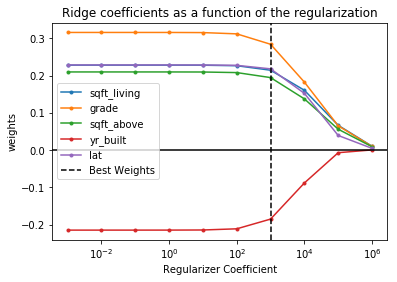

In [136]:
ax = plt.gca()

ax.plot(l2_lambda, [[i[3],i[9],i[10],i[12],i[15]] for i in coeff], '.-')
ax.set_xscale('log')
plt.xlabel('Regularizer Coefficient')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.axvline(x=l2_lambda[error.index(min(error))], ls='--', color='black', label="Best Weights")
plt.axhline(y=0, ls='-', color='black')
plt.legend(['sqft_living','grade','sqft_above','yr_built','lat','Best Weights'])
plt.show()


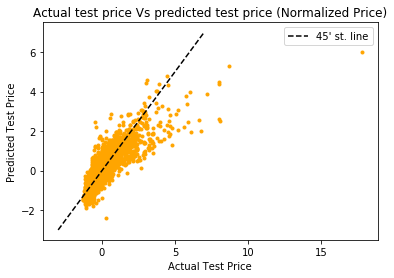

In [133]:
plt.plot(range(-3,8), range(-3,8), '--', c='black', label = "45' line")
plt.scatter(Y_test, Y_pred_test, marker='.', c='orange')
plt.title("Actual test price Vs predicted test price (Normalized Price)")
plt.xlabel("Actual Test Price")
plt.ylabel("Predicted Test Price")
plt.legend(["45' st. line",])
plt.show()
    